In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
#Para trabajar en Google colab
# from google.colab import files
# files.upload()

#Carga desde un archivo .csv sin indice
data=pd.read_csv("Bangkok_cuantitativas.csv")


In [ ]:
#Verificamos información del DataFrame
data.info()

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

In [21]:
#Crear 2 dataframes para poder procesar los outliers
# cuantitativas = data.iloc[ : , 1:23 ]
# cualitativas= data.iloc[ : , [0] ]
#cuantitativas = data.iloc[ : , 5,6,12,13,15,16,18:26,28:34,37:43,45]
cuantitativas= data.iloc[ : , 0:30 ]



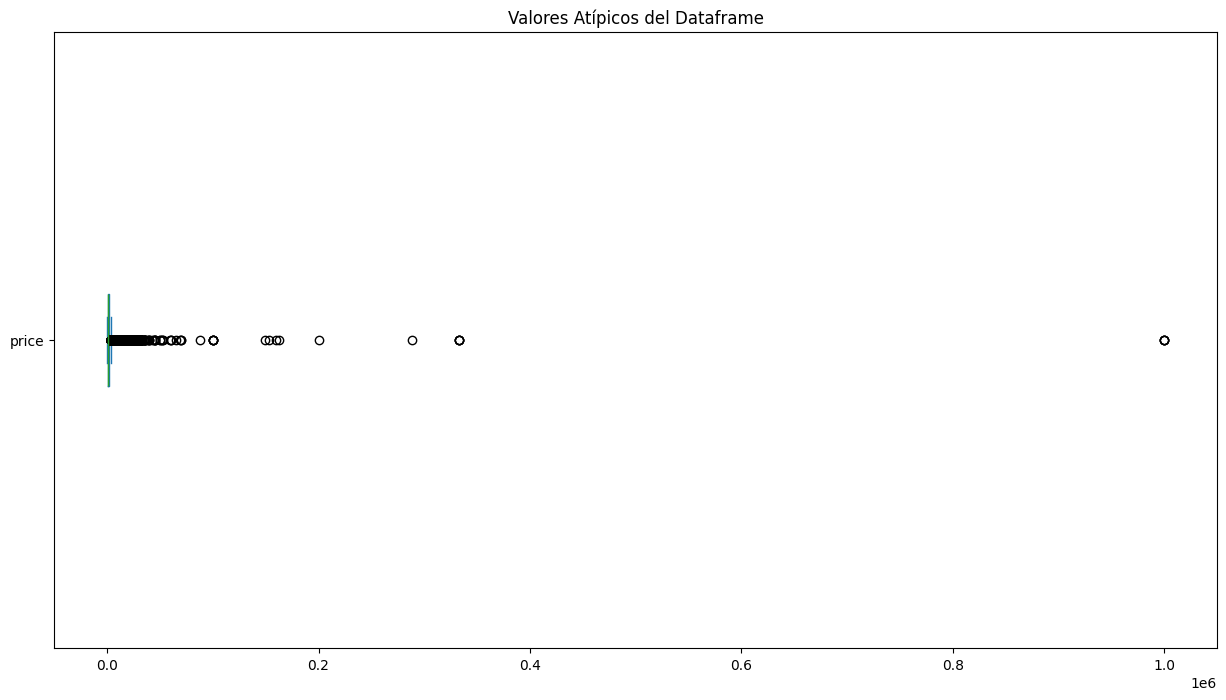

In [40]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas['price'].plot(kind='box', vert=False)
#CORREGIR cuantitativas.plot(['panaderia'], kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Límite inferior permitido", Limite_Inferior)


In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

In [ ]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

In [ ]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data_clean.isnull().sum()
valores_nulos

**PROCEDIMIENTO "CUARTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas
 
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25
 
Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Límite superior permitido", Limite_Superior_iqr)
print("Límite inferior permitido", Limite_Inferior_iqr)


In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

In [ ]:
#Corroboramos valores nulos del dataframe4_iqr
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

In [ ]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
 
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

In [26]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum().sum()
valores_nulos

np.int64(0)

In [27]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Datos_limpios.csv")

In [ ]:
# from google.colab import files
# 